<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/tree/master/ArchivosLatexTP1_Cluster_Todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T.P. 1 Algoritmos de Clustering sobre archivos de Spotify

## Levantamos dataset del PreTP

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)

# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 16
from IPython.display import Audio, Markdown, Image

def dmd(x):
    display(Markdown(x))

# Números y Datos
import numpy as np
import pandas as pd
import random

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

# Clustering (otros)
!pip install gower
import gower

!pip install scikit-learn-extra 
from sklearn_extra.cluster import KMedoids 


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image, YouTubeVideo, HTML

# Machine learning
from sklearn.datasets import samples_generator, fetch_openml, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Levantamos el archivo pickle generado como resultado del PRE-TP1**

In [70]:
import pickle
df_total = pd.read_pickle('df_total.p')
# mostramos dimensiones y primeros registros
print(df_total.shape)
df_total.head(10)

(4082, 71)


id       mp0  ...  energy_logit  loudness_logit
0  00At7PWydsvg7g5xgaYan9  0.354425  ...      2.713416        2.933962
1  00BgcUYkIImsDN5rNjkR1U  0.233490  ...      3.006179        3.154919
2  00WgnFIsY1y84p7mYAJRuF  0.510113  ...      2.614645        1.858252
3  00X2ieWUjpzdNwDU2Jlg6i  0.570225  ...      3.374210        2.286145
4  00isAURAZeKQXv6CW2vckb  0.350877  ...     -1.622804        0.345908
5  00kO4Z0mFAFs6KLlXnaD0f  0.440426  ...     -1.682249        0.399799
6  00nhkvorbdardFjuIi2OOo  0.395587  ...      1.351922        1.194353
7  00r6WtlzQELtNFjSfgQJas  0.336907  ...     -0.994165        0.742764
8  01IEMsoSrK1WXJeuumBZX1  0.678865  ...           NaN        2.286667
9  01K7WtcFrsolt07wYU8zTY  0.332244  ...     -0.748160        0.365772

[10 rows x 71 columns]

In [71]:
# columnas del dataset
df_total.columns

Index(['id', 'mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8',
       'mp9', 'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5',
       'sdp6', 'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt0', 'mt1', 'mt2',
       'mt3', 'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm', 'artists', 'genre', 'release_date',
       'album_name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'speechiness_log', 'liveness_log', 'valence_log', 'valence_logit',
       'acousticness_logit', 'instrumentalness_logit', 'energy_logit',
       'loudness_logit'],
      dtype='object')

In [72]:
# tipos de datos de las columnas
df_total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4082 non-null   object 
 1   mp0                     4082 non-null   float64
 2   mp1                     4082 non-null   float64
 3   mp2                     4082 non-null   float64
 4   mp3                     4082 non-null   float64
 5   mp4                     4082 non-null   float64
 6   mp5                     4082 non-null   float64
 7   mp6                     4082 non-null   float64
 8   mp7                     4082 non-null   float64
 9   mp8                     4082 non-null   float64
 10  mp9                     4082 non-null   float64
 11  mp10                    4082 non-null   float64
 12  mp11                    4082 non-null   float64
 13  sdp0                    4082 non-null   float64
 14  sdp1                    4082 non-null   

Transformamos las categorias a números para usarlas los labels numéricos:

In [73]:
df_total['genre_num']= pd.factorize(df_total['genre'])[0]
df_total[['genre_num','genre']].value_counts()

genre_num  genre            
4          death-metal          486
1          ska                  477
0          drum-and-bass        477
6          trance               475
5          opera                461
8          singer-songwriter    447
7          ambient              442
3          jazz                 421
2          classical            396
dtype: int64

Funciones auxiliares

In [74]:
# silhoutte pertenece a los metodos de VALIDACION INTERNA/NO SUPERVISADA
# esta es la funcion para graficar coeficiente de silhouette, que se usa más adelante
import matplotlib.cm as cm

def grafica_silhouette_2(labels_,d):
  k=len(labels_.unique())
  silhouette_avg = silhouette_score(d,labels_,metric='precomputed')
  sample_silhouette_values = silhouette_samples(d,labels_,metric='precomputed')

  plt.rcParams['figure.figsize'] = (8,6)
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(labels_) + (k + 1) * 10])

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[labels_ == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                "with k = %d" % k),
                fontsize=14, fontweight='bold')
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

In [75]:
def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)

In [78]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [79]:
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

## Generamos 5 conjuntos de datos.
Aplicaremos varios algoritmos de cluster. Las caracteristicas de estos dataframe son:

*   DF1 - Todas las variables numéricas, sin los NA
*   DF2 - Sólo con las variables de timbres y pitches
*   DF3 - Sólo con las variables de timbres
*   DF4 - Sólo con las variables de pitches
*   DF5 - Sólo con Audio Features (Alto Nivel)


**Generamos DF1- Todas las variables numéricas, elimino NA:**

In [80]:
# pregunta aca, estaban ambas columnas valence_log y valence_logit, no habria que sacar una??
DF = df_total.drop(['id','artists','album_name','release_date','mt0','valence','acousticness', 
                   'instrumentalness','energy','loudness'], axis=1)
#DF = df_total.drop(['id','artists','album_name','release_date'], axis=1)   

In [81]:
DF.columns

Index(['mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt1', 'mt2', 'mt3', 'mt4',
       'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0', 'sdt1',
       'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9', 'sdt10',
       'sdt11', 'mt0_norm', 'genre', 'danceability', 'speechiness', 'liveness',
       'tempo', 'speechiness_log', 'liveness_log', 'valence_log',
       'valence_logit', 'acousticness_logit', 'instrumentalness_logit',
       'energy_logit', 'loudness_logit', 'genre_num'],
      dtype='object')

In [82]:
DF.describe()

mp0          mp1  ...  loudness_logit    genre_num
count  4082.000000  4082.000000  ...     4080.000000  4082.000000
mean      0.423272     0.423572  ...        1.259677     3.993386
std       0.159062     0.170415  ...        0.935900     2.592131
min       0.000000     0.000000  ...       -4.595120     0.000000
25%       0.310479     0.297935  ...        0.626074     2.000000
50%       0.422400     0.415484  ...        1.353399     4.000000
75%       0.537655     0.551067  ...        1.942827     6.000000
max       0.967849     1.000000  ...        5.823450     8.000000

[8 rows x 61 columns]

In [83]:
DF = DF.dropna()

In [84]:
DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4081
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mp0                     3772 non-null   float64
 1   mp1                     3772 non-null   float64
 2   mp2                     3772 non-null   float64
 3   mp3                     3772 non-null   float64
 4   mp4                     3772 non-null   float64
 5   mp5                     3772 non-null   float64
 6   mp6                     3772 non-null   float64
 7   mp7                     3772 non-null   float64
 8   mp8                     3772 non-null   float64
 9   mp9                     3772 non-null   float64
 10  mp10                    3772 non-null   float64
 11  mp11                    3772 non-null   float64
 12  sdp0                    3772 non-null   float64
 13  sdp1                    3772 non-null   float64
 14  sdp2                    3772 non-null   

Aplicamos Silhouette para ver si este conjunto de datos se agrupa naturalmente por los géneros dados:

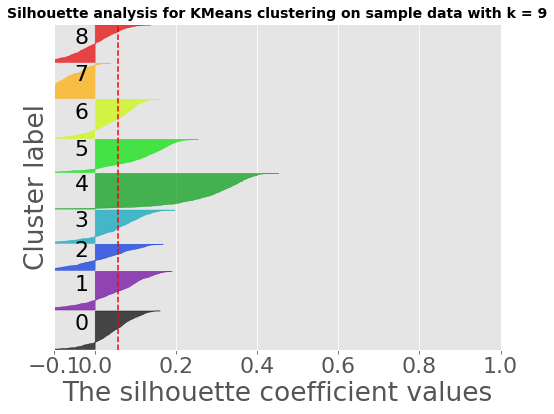

In [85]:
d_meta_total_1 = DF.drop(['genre','genre_num'], axis=1)   
d_meta_total_1 = gower.gower_matrix(d_meta_total_1)

grafica_silhouette_2(DF['genre_num'],d_meta_total_1)

(OJO HAY QUE VLVER A ANALIZARLOS)Los generos que estan peor clasificados son, 6-trace y 7-ambiente. Se destacan bien clasificados el 4 -death-metal y 5- opera. Los generos 1-ska y 0- drum-and-bass, bastante bien clasificados tambien.

**Generamos DF2 - Solo con las variables de timbres y pitches:**

In [86]:
DF2 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','mt0'], axis=1)   
# 'genre',

In [87]:
DF2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mp0        4082 non-null   float64
 1   mp1        4082 non-null   float64
 2   mp2        4082 non-null   float64
 3   mp3        4082 non-null   float64
 4   mp4        4082 non-null   float64
 5   mp5        4082 non-null   float64
 6   mp6        4082 non-null   float64
 7   mp7        4082 non-null   float64
 8   mp8        4082 non-null   float64
 9   mp9        4082 non-null   float64
 10  mp10       4082 non-null   float64
 11  mp11       4082 non-null   float64
 12  sdp0       4082 non-null   float64
 13  sdp1       4082 non-null   float64
 14  sdp2       4082 non-null   float64
 15  sdp3       4082 non-null   float64
 16  sdp4       4082 non-null   float64
 17  sdp5       4082 non-null   float64
 18  sdp6       4082 non-null   float64
 19  sdp7       4082 non-null   float64
 20  sdp8    

Aplicamos Silhouette para ver si este conjunto de datos se agrupa naturalmente por los géneros dados:

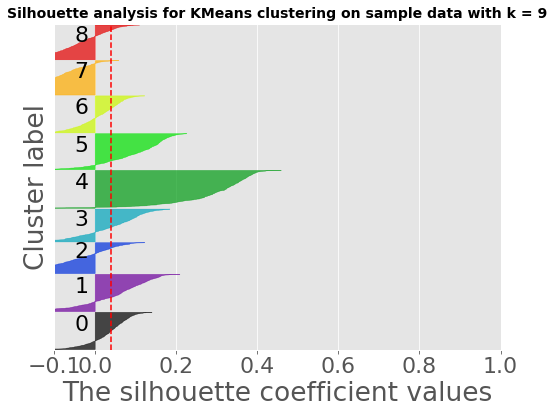

In [88]:
d_meta_total_2 = DF2.drop(['genre','genre_num'], axis=1)   
d_meta_total_2 = gower.gower_matrix(d_meta_total_2)

grafica_silhouette_2(DF2['genre_num'],d_meta_total_2)

Los generos que estan peor clasificados son 8 -singer-songwriter, 7-ambient , 2-classical, en menor medida 6- trance . Estan bien clasificados el 4 -death-metal y 5- opera. Y los generos 1-ska y 0- drum-and-bass, bastante bien clasificados tambien.

**Generamos DF3 - Solo con las variables de timbres:**

In [89]:
DF3 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11','mt0_norm'], axis=1)   
#'genre

In [90]:
DF3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mt0        4082 non-null   float64
 1   mt1        4082 non-null   float64
 2   mt2        4082 non-null   float64
 3   mt3        4082 non-null   float64
 4   mt4        4082 non-null   float64
 5   mt5        4082 non-null   float64
 6   mt6        4082 non-null   float64
 7   mt7        4082 non-null   float64
 8   mt8        4082 non-null   float64
 9   mt9        4082 non-null   float64
 10  mt10       4082 non-null   float64
 11  mt11       4082 non-null   float64
 12  sdt0       4082 non-null   float64
 13  sdt1       4082 non-null   float64
 14  sdt2       4082 non-null   float64
 15  sdt3       4082 non-null   float64
 16  sdt4       4082 non-null   float64
 17  sdt5       4082 non-null   float64
 18  sdt6       4082 non-null   float64
 19  sdt7       4082 non-null   float64
 20  sdt8    

Aplicamos Silhouette para ver si este conjunto de datos se agrupa naturalmente por los géneros dados:

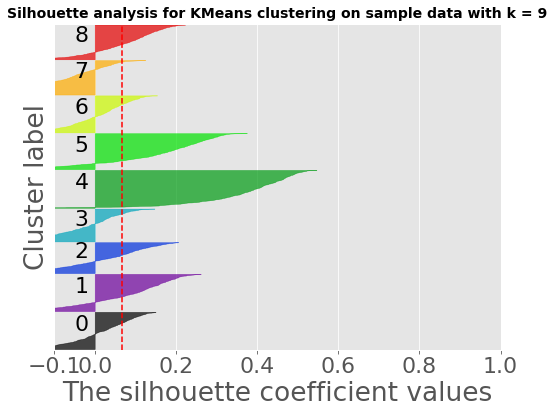

In [91]:
d_meta_total_3 = DF3.drop(['genre','genre_num'], axis=1)   
d_meta_total_3 = gower.gower_matrix(d_meta_total_3)

grafica_silhouette_2(DF3['genre_num'],d_meta_total_3)

El genero 7-ambient, es el peor clasificado. Le siguen en menor medida el 3-jazz,6-trance . El mejor clasificado es 4-death-metal, le siguen el 5-opera  y 1-ska , con una buena clasificacion



**Generamos DF4 - Solo con las variables de pitches:**

In [92]:
DF4 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','mt0', 'mt1', 'mt2', 'mt3',
       'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm'], axis=1)   
#genre

In [93]:
DF4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mp0        4082 non-null   float64
 1   mp1        4082 non-null   float64
 2   mp2        4082 non-null   float64
 3   mp3        4082 non-null   float64
 4   mp4        4082 non-null   float64
 5   mp5        4082 non-null   float64
 6   mp6        4082 non-null   float64
 7   mp7        4082 non-null   float64
 8   mp8        4082 non-null   float64
 9   mp9        4082 non-null   float64
 10  mp10       4082 non-null   float64
 11  mp11       4082 non-null   float64
 12  sdp0       4082 non-null   float64
 13  sdp1       4082 non-null   float64
 14  sdp2       4082 non-null   float64
 15  sdp3       4082 non-null   float64
 16  sdp4       4082 non-null   float64
 17  sdp5       4082 non-null   float64
 18  sdp6       4082 non-null   float64
 19  sdp7       4082 non-null   float64
 20  sdp8    

Aplicamos Silhouette para ver si este conjunto de datos se agrupa naturalmente por los géneros dados:

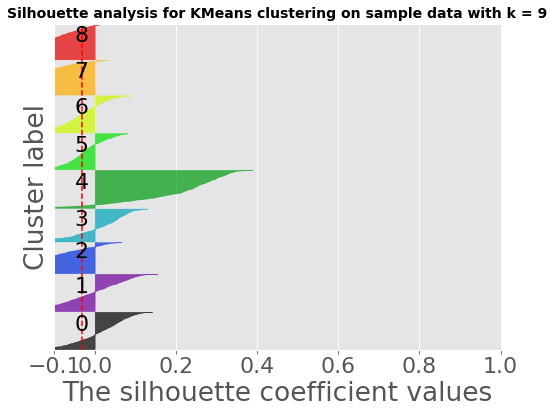

In [94]:
d_meta_total_4 = DF4.drop(['genre','genre_num'], axis=1)   
d_meta_total_4 = gower.gower_matrix(d_meta_total_4)

grafica_silhouette_2(DF4['genre_num'],d_meta_total_4)

REVISAR Los generos que estan peor clasificados sin  7-ambient , 6- trance, 3-jazz , 0-drum-and-bass. El genero 4-death-metal, esta muy bien clasificado. Mientras que el 5-opera  y 1-ska , con una buena clasificacion

**Generamos DF5 - Solo con Audio Features (Alto Nivel):**

In [95]:
# pregunta aca, idem variable valence_log y valence_logit
DF5 = df_total[['danceability', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','genre_num']] 
DF5.head()

danceability     tempo  ...          genre  genre_num
0      0.533827  0.810248  ...  drum-and-bass          0
1      0.382664  0.814705  ...  drum-and-bass          0
2      0.468288  0.815129  ...  drum-and-bass          0
3      0.464059  0.419984  ...            ska          1
4      0.238901  0.320465  ...      classical          2

[5 rows x 12 columns]

In [96]:
DF5.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   danceability            4082 non-null   float64
 1   tempo                   4082 non-null   float64
 2   speechiness_log         4082 non-null   float64
 3   liveness_log            4082 non-null   float64
 4   valence_log             4082 non-null   float64
 5   valence_logit           4072 non-null   float64
 6   acousticness_logit      3883 non-null   float64
 7   instrumentalness_logit  4076 non-null   float64
 8   energy_logit            3987 non-null   float64
 9   loudness_logit          4080 non-null   float64
 10  genre                   4082 non-null   object 
 11  genre_num               4082 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 414.6+ KB


In [97]:
DF5 = DF5.dropna()
DF5.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4081
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   danceability            3772 non-null   float64
 1   tempo                   3772 non-null   float64
 2   speechiness_log         3772 non-null   float64
 3   liveness_log            3772 non-null   float64
 4   valence_log             3772 non-null   float64
 5   valence_logit           3772 non-null   float64
 6   acousticness_logit      3772 non-null   float64
 7   instrumentalness_logit  3772 non-null   float64
 8   energy_logit            3772 non-null   float64
 9   loudness_logit          3772 non-null   float64
 10  genre                   3772 non-null   object 
 11  genre_num               3772 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 383.1+ KB


Aplicamos Silhouette para ver si este conjunto de datos se agrupa naturalmente por los géneros dados:

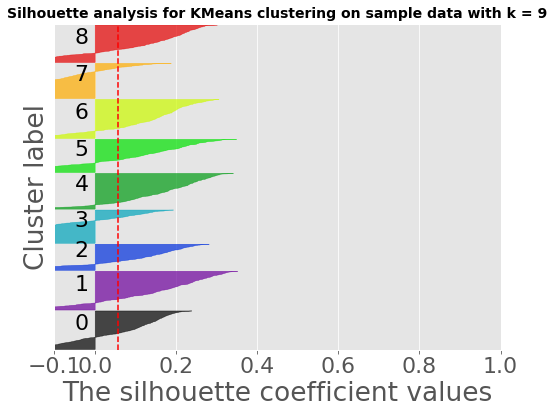

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#antes escalamos los datos porque no acepta valores negativos
scaled_df = scaler.fit_transform(DF5.drop(['genre','genre_num'], axis=1))

d_meta_total_5 = scaled_df 
d_meta_total_5 = gower.gower_matrix(d_meta_total_5)

grafica_silhouette_2(DF5['genre_num'],d_meta_total_5)


REVISAR A excepcion del genero 4 -death-metal, los demas generos estan mal clasificados

# Algoritmo KMeans

## **DF1 - Todas las variables numéricas, sin los NA**



Con los gráficos del promedio de Silhouette y SSE, tratamos de ver cuál sería la cantidad optima de clusters para este conjunto de datos

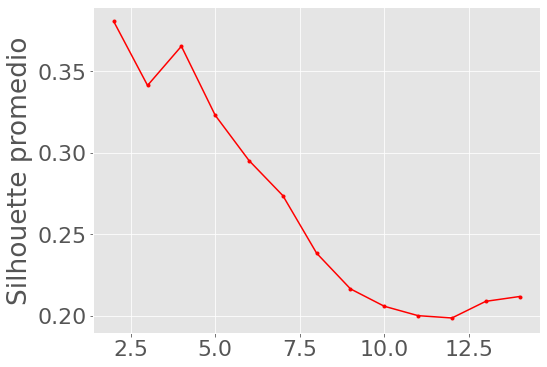

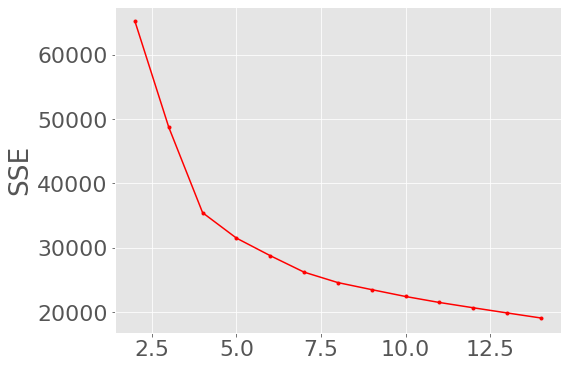

In [171]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta = KMeans(n_clusters=k, random_state=42).fit(DF1)

  silhouette_avg = silhouette_score(DF1,KM_meta.labels_, metric='euclidean')

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhouette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


Aplicamos el algoritmo kMeans para k=4. Generamos la matriz de confusion como método de validacion externa para ver si los agrupamientos son similares a los reales

In [172]:
DF1= DF.drop(['genre','genre_num'], axis=1)
kmeans1 = KMeans(n_clusters=4, random_state=0).fit(DF1)

tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1.labels_})# Create a DataFrame with labels and varieties as columns: df
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters             0    1    2    3
Labels                               
ambient             20    1  300   97
classical           49    0  262    0
death-metal          2  133    6  284
drum-and-bass        0  164    0  294
jazz               184   29  142   41
opera              353    1   39    1
singer-songwriter  277  138   24    6
ska                 15  410   10   26
trance               1  145    4  314

Calculamos los indices de Rand y Hopkins(?) y Van Dongen

In [179]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari1 = adjusted_rand_score(DF.genre, kmeans1.labels_)
ari1

0.24735812443755645

In [180]:
Hopkins (scaler.fit_transform(DF1))

Numero de puntos al azar por defecto


0.07786782295515247

In [181]:
vanDongen(ct1)
# este es el mejor indice?

0.5798570716303806

**PCA**

Varianza explicada [0.54116663 0.3022743  0.07402161 0.04643612 0.00685087 0.00411295]
Varianza explicada total 0.9748624683611976


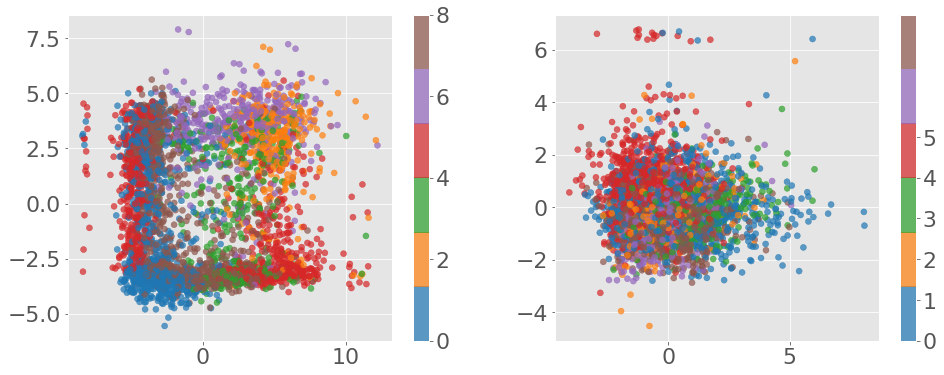

In [176]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF1)
Y=pd.factorize(DF.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

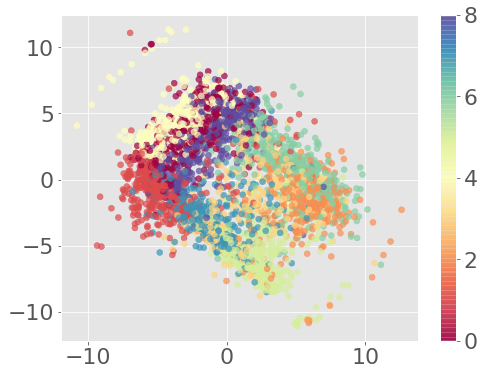

In [177]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

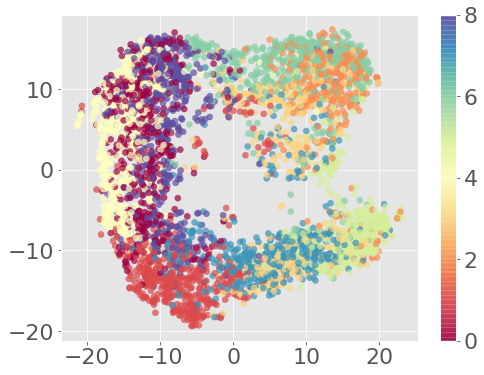

In [178]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

## DF2 - Sólo con las variables de timbres y pitches

In [187]:
DF2_2= DF2.drop(['genre','genre_num'], axis=1)

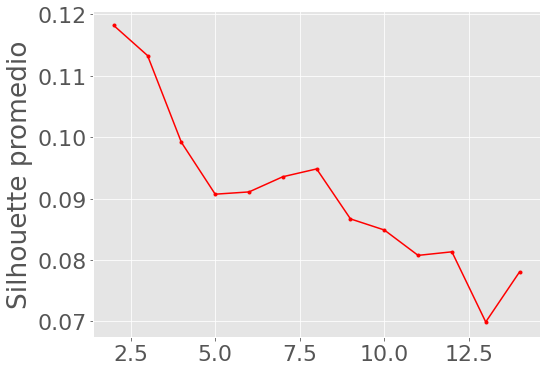

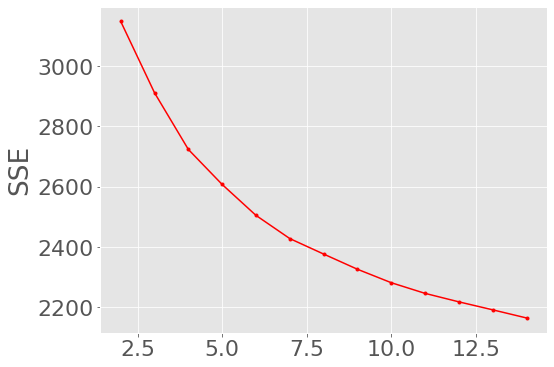

In [188]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta = KMeans(n_clusters=k, random_state=42).fit(DF2_2)
# ojo aca ver el precomputed y el dataframe que usa
  silhouette_avg = silhouette_score(DF2_2,KM_meta.labels_)

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)
    #KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    #silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    #sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhouette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


In [189]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(DF2_2)
kmeans2.labels_

tmp2 = pd.DataFrame({'Labels': DF2.genre, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct2 = pd.crosstab(tmp2['Labels'], tmp2['Clusters']) # Create crosstab: ct
ct2

Clusters             0    1    2
Labels                          
ambient             38  154  250
classical           10  113  273
death-metal        478    3    5
drum-and-bass      249  205   23
jazz                20  337   64
opera                4  279  178
singer-songwriter   21  202  224
ska                279  166   32
trance             243  194   38

Para esta combinacion de variables, la cantidad de clusters optimo es de 6, al igual que el caso anterior.

Calculamos los indices de Rand y Hopkins(?) y Van Dongen

In [190]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari2 = adjusted_rand_score(DF2.genre, kmeans2.labels_)
ari2

0.12451994346901606

In [ ]:
Hopkins (scaler.fit_transform(DF2_2))

In [192]:
vanDongen(ct2)
# este es el mejor indice?

0.7409128630705394

**PCA**

In [ ]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF2_2)
Y=pd.factorize(DF2.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

In [ ]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF2_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

In [ ]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF2_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

## DF3 - Sólo con las variables de timbres

In [193]:
DF3_2= DF3.drop(['genre','genre_num'], axis=1)

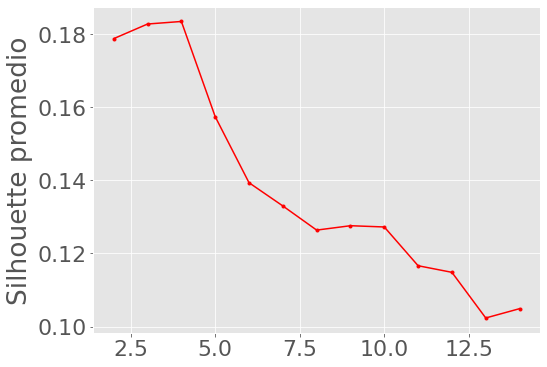

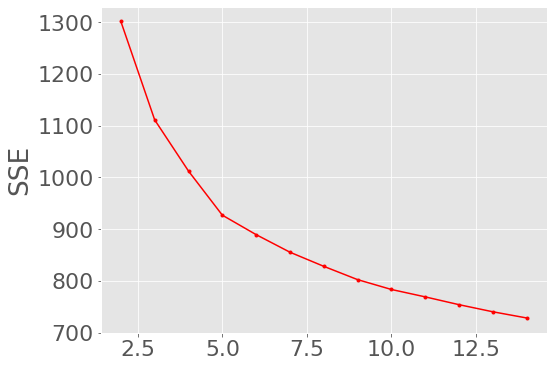

In [196]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta = KMeans(n_clusters=k, random_state=475).fit(DF3_2)
# ojo aca ver el precomputed y el dataframe que usa
  silhouette_avg = silhouette_score(DF3_2,KM_meta.labels_)

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhouette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

In [197]:
kmeans3 = KMeans(n_clusters=4, random_state=0).fit(DF3_2)
kmeans3.labels_

tmp3 = pd.DataFrame({'Labels': DF3.genre, 'Clusters': kmeans3.labels_})# Create a DataFrame with labels and varieties as columns: df
ct3= pd.crosstab(tmp3['Labels'], tmp3['Clusters']) # Create crosstab: ct
ct3

Clusters             0    1    2    3
Labels                               
ambient             92   23  309   18
classical            7  113  273    3
death-metal          3    1    6  476
drum-and-bass      203    2    4  268
jazz               326   45   34   16
opera               18  387   48    8
singer-songwriter  333    8   53   53
ska                253    0    0  224
trance             285    2   14  174

Si consideramos solo los atributos de timbres, la cantidad de clusters que mejor clasificac sería de 3.

Calculamos los indices de Rand y Hopkins(?) y Van Dongen

In [198]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari3 = adjusted_rand_score(DF3.genre, kmeans3.labels_)
ari3

0.2190019846006269

In [199]:
Hopkins (scaler.fit_transform(DF3_2))

Numero de puntos al azar por defecto


0.05677382462900128

In [200]:
vanDongen(ct3)
# este es el mejor indice?

0.6088015589477103

**PCA**

Varianza explicada [0.32111321 0.19142434 0.09025216 0.06768311 0.05001172 0.03816599]
Varianza explicada total 0.7586505262641811


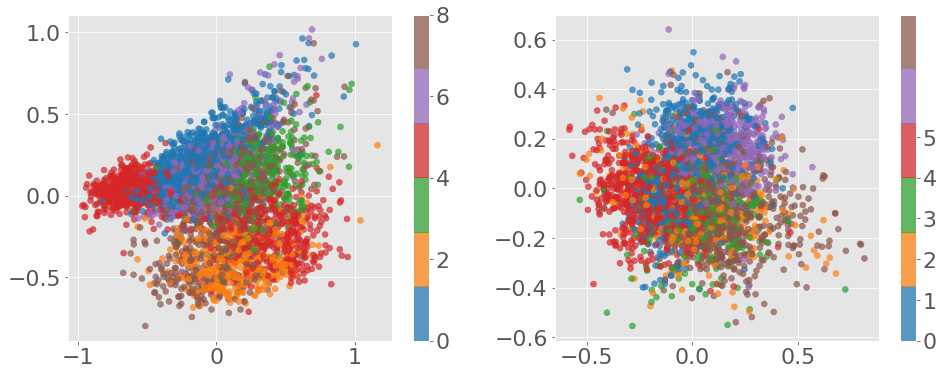

In [138]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF3_2)
Y=pd.factorize(DF3.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

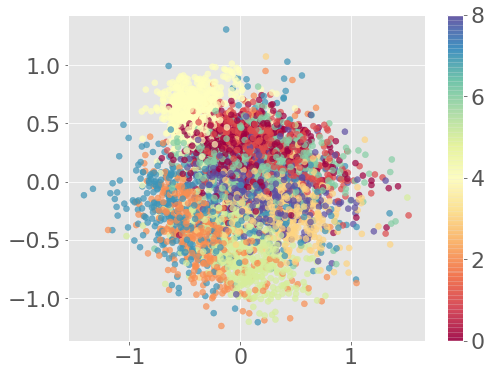

In [139]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF3_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

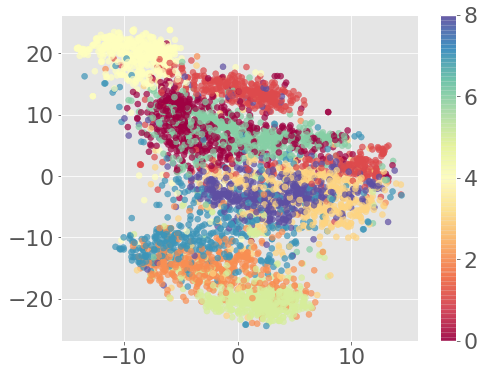

In [ ]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF3_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

## DF4 - Sólo con las variables de pitches

In [215]:
DF4_2= DF4.drop(['genre','genre_num'], axis=1)

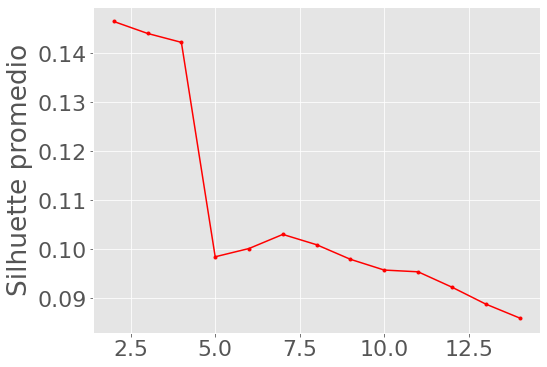

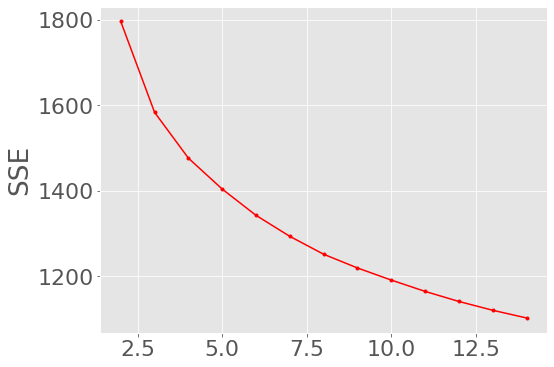

In [216]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta = KMeans(n_clusters=k, random_state=471).fit(DF4_2)
# ojo aca ver el precomputed y el dataframe que usa
  silhouette_avg = silhouette_score(DF4_2,KM_meta.labels_)

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

In [219]:
kmeans4 = KMeans(n_clusters=9, random_state=0).fit(DF4_2)
kmeans4.labels_

tmp4 = pd.DataFrame({'Labels': DF4.genre, 'Clusters': kmeans4.labels_})# Create a DataFrame with labels and varieties as columns: df
ct4= pd.crosstab(tmp4['Labels'], tmp4['Clusters']) # Create crosstab: ct
ct4

Clusters             0   1    2    3   4   5   6    7    8
Labels                                                    
ambient              6  57   41   39  79  84  56   33   47
classical            2  51   81    6  79  30  62   18   67
death-metal        395   2    3   21   1   1   1   50   12
drum-and-bass       11   0   22  131   0   9  21  215   68
jazz                11   5  165   33  19  35  20   47   86
opera                2  21  131    6  27  48  69   42  115
singer-songwriter    2  67   70   15  60  60  71   14   88
ska                 70   3   40   53   7  19  37   88  160
trance              38   0   16  202   0   6  18  123   72

Para este conjunto de datos, los clusters optimos son 3.

Calculamos los indices de Rand y Hopkins(?) y Van Dongen

In [204]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari4 = adjusted_rand_score(DF4.genre, kmeans4.labels_)
ari4

0.11043016153817935

In [205]:
Hopkins (scaler.fit_transform(DF4_2))

Numero de puntos al azar por defecto


0.06182847071733931

In [206]:
vanDongen(ct4)
# este es el mejor indice?

0.7623251165889408

**PCA**

Varianza explicada [0.20547765 0.16521381 0.12627058 0.08147408 0.06499146 0.06072791]
Varianza explicada total 0.7041554846291979


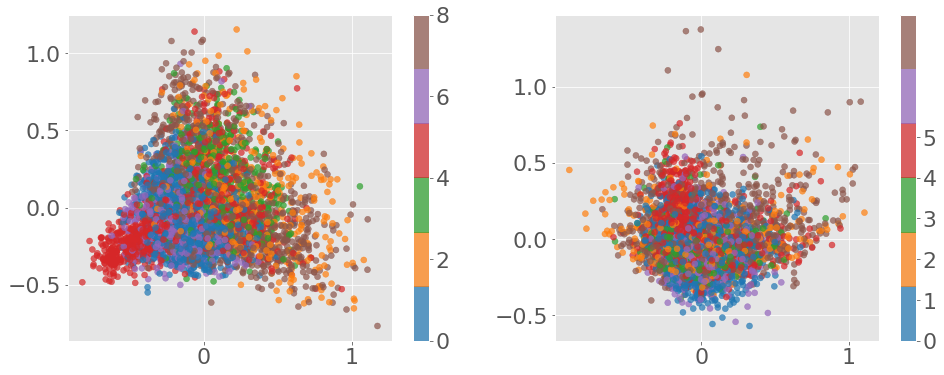

In [ ]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF4_2)
Y=pd.factorize(DF4.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

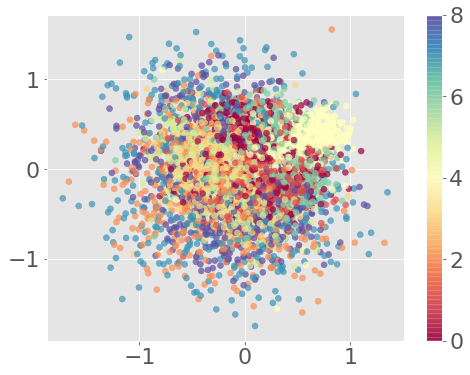

In [ ]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF4_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

ValueError: ignored

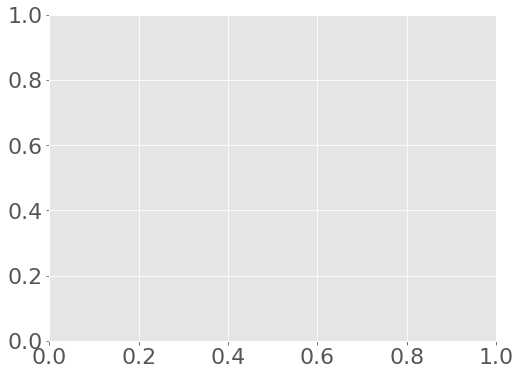

In [220]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF4_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

## DF5 - Sólo con Audio Features (Alto Nivel)

In [207]:
DF5_2= DF5.drop(['genre','genre_num'], axis=1)

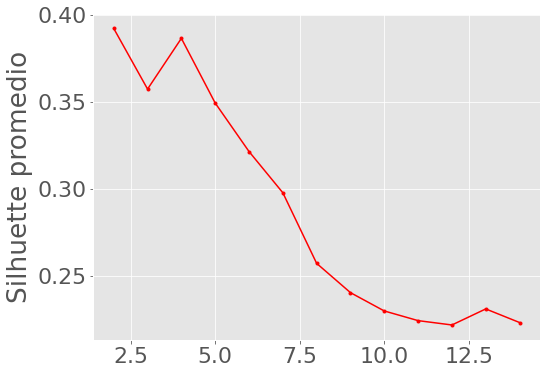

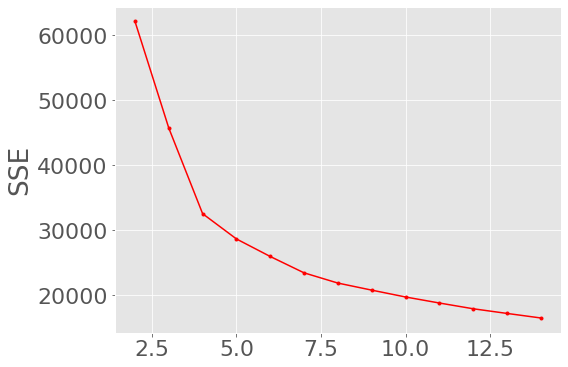

In [208]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta = KMeans(n_clusters=k, random_state=471).fit(DF5_2)
# ojo aca ver el precomputed y el dataframe que usa
  silhouette_avg = silhouette_score(DF5_2,KM_meta.labels_)

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhouette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

In [209]:
kmeans5 = KMeans(n_clusters=4, random_state=0).fit(DF5_2)
kmeans5.labels_

tmp5 = pd.DataFrame({'Labels': DF5.genre, 'Clusters': kmeans5.labels_})# Create a DataFrame with labels and varieties as columns: df
ct5= pd.crosstab(tmp5['Labels'], tmp5['Clusters']) # Create crosstab: ct
ct5

Clusters             0    1    2    3
Labels                               
ambient             20    1   97  300
classical           49    0    0  262
death-metal          2  133  284    6
drum-and-bass        0  164  294    0
jazz               184   29   40  143
opera              353    1    1   39
singer-songwriter  276  140    6   23
ska                 15  410   26   10
trance               1  145  313    5

Calculamos los indices de Rand (Validacion Externa)y Hopkins(Tendencia al Clustering) y Van Dongen (Validacion Externa)

In [211]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari5 = adjusted_rand_score(DF5.genre, kmeans5.labels_)
ari5

0.24718597669235548

In [212]:
Hopkins (scaler.fit_transform(DF5_2))

Numero de puntos al azar por defecto


0.049353645287934435

In [213]:
vanDongen(ct5)
# este es el mejor indice?

0.5801628177438113

**PCA**

Varianza explicada [0.55365561 0.310585   0.0757516  0.04705507 0.00642806 0.00331682]
Varianza explicada total 0.9967921731825962


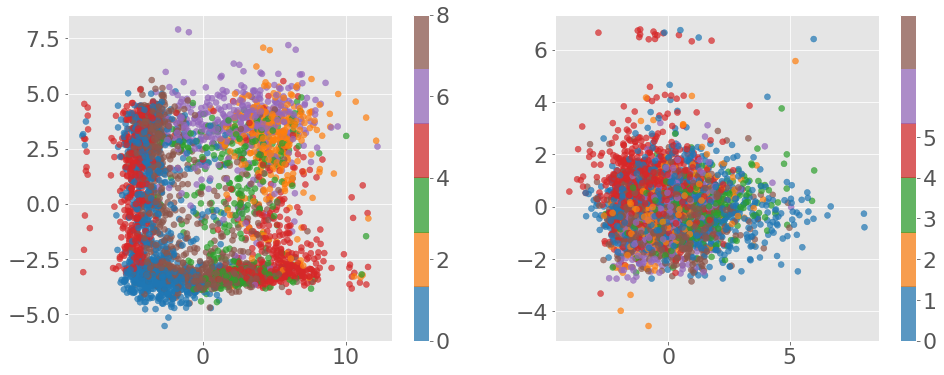

In [157]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF5_2)
Y=pd.factorize(DF5.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

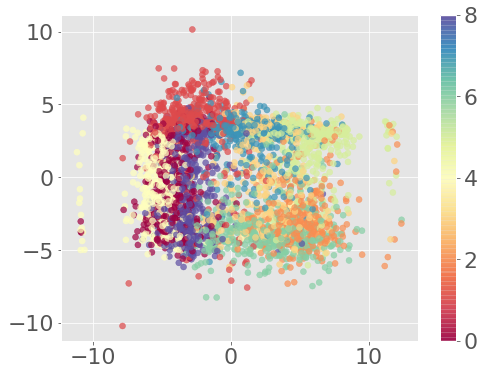

In [159]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF5_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

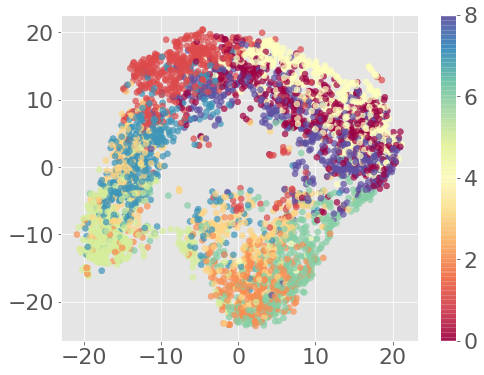

In [ ]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF5_2)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

# Algoritmo KMedias (outliers)

## **DF1 - Todas las variables numéricas, sin los NA**



Con los gráficos del promedio de Silhouette y SSE, tratamos de ver cuál sería la cantidad optima de clusters para este conjunto de datos

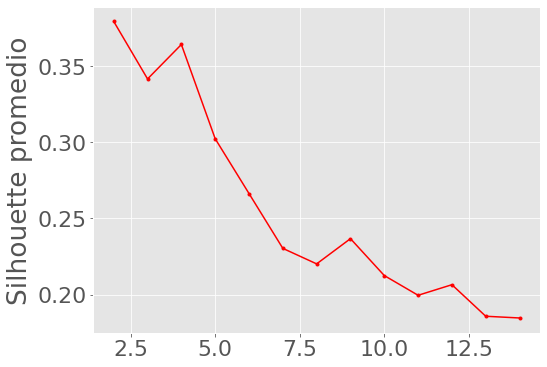

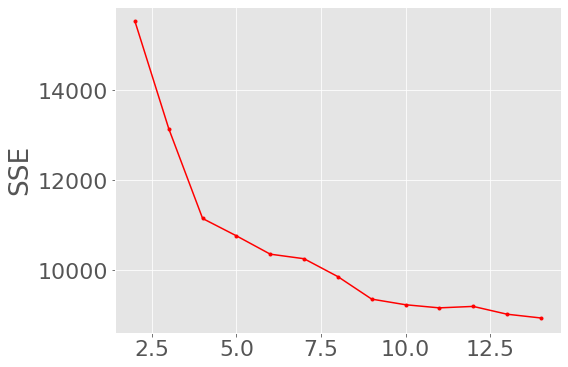

In [221]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
  KM_meta =KMedoids(n_clusters=k, random_state=0).fit(DF1)  

  silhouette_avg = silhouette_score(DF1,KM_meta.labels_, metric='euclidean')

  silh.append(silhouette_avg)
  #print("Para", k,"clusters, el promedio del score de silhouette es:", round(silhouette_avg,4))
  
  sse.append(KM_meta.inertia_)

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhouette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


Aplicamos el algoritmo kMeans para k=4. Generamos la matriz de confusion como método de validacion externa para ver si los agrupamientos son similares a los reales

In [222]:
DF1= DF.drop(['genre','genre_num'], axis=1)
kmeans1M = KMedoids(n_clusters=9, random_state=0).fit(DF1)  


tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1.labels_})# Create a DataFrame with labels and varieties as columns: df
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters             0    1    2    3
Labels                               
ambient             20    1  300   97
classical           49    0  262    0
death-metal          2  133    6  284
drum-and-bass        0  164    0  294
jazz               184   29  142   41
opera              353    1   39    1
singer-songwriter  277  138   24    6
ska                 15  410   10   26
trance               1  145    4  314

Calculamos los indices de Rand y Hopkins(?) y Van Dongen

In [ ]:
from sklearn.metrics import adjusted_rand_score

# este es el mejor indice?
ari1 = adjusted_rand_score(DF.genre, kmeans1.labels_)
ari1

0.24735812443755645

In [ ]:
Hopkins (scaler.fit_transform(DF1))

Numero de puntos al azar por defecto


0.07786782295515247

In [ ]:
vanDongen(ct1)
# este es el mejor indice?

0.5798570716303806

**PCA**

Varianza explicada [0.54116663 0.3022743  0.07402161 0.04643612 0.00685087 0.00411295]
Varianza explicada total 0.9748624683611976


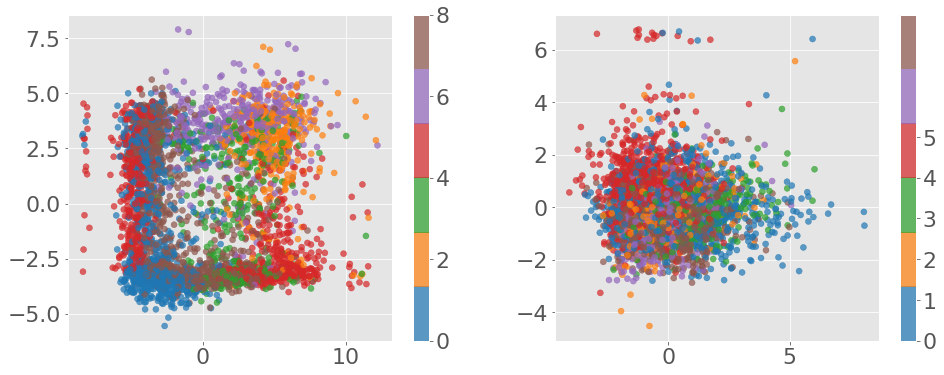

In [ ]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(DF1)
Y=pd.factorize(DF.genre)[0]

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=Y,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

**MDS**

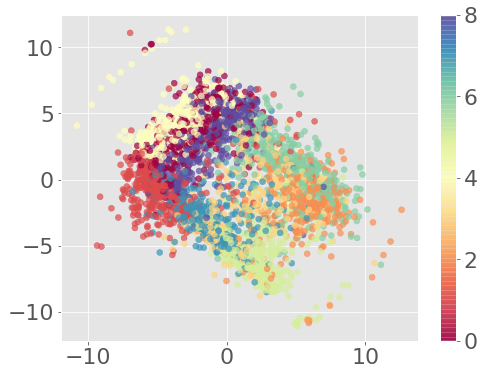

In [ ]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=500)
Xred = mds.fit_transform(DF1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

**T-distributed Stochastic Neighbor Embedding (TSNE)**

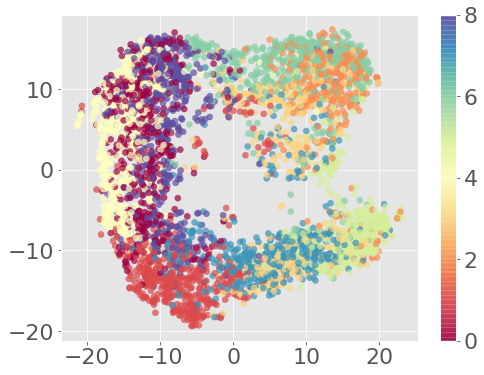

In [ ]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(DF1)
plt.scatter(Xred[:,0],Xred[:,1],c=Y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

# Algoritmo Jerárquico

# Otros

In [ ]:
#DF1=DF.drop(['genre','genre_num'], axis=1)
#DF1=scaler.fit_transform(DF1)

# esto para despues jerarquico
#z = linkage(DF1, method='average', metric='euclidean')
#plt.figure()
#dn = dendrogram(z)

In [ ]:
DF1=DF.drop(['genre','genre_num'], axis=1)
DF1=scaler.fit_transform(DF1)

kmeans1M = KMedoids(n_clusters=9, random_state=0).fit(DF1)

tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1M.labels_})
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters            0    1    2    3   4    5    6   7    8
Labels                                                     
ambient            12   56   13  105   3  173    5  19   32
classical           9    8    1   25   3  245    1   8   11
death-metal        37    3    3    4   2    1  369   3    3
drum-and-bass      16   37  148   39   7    0  195   7    9
jazz               33   46   12   84  34   34   11  62   80
opera              35    0    9    2  76  235    0  29    8
singer-songwriter  87   15   74   28  17   19    6  25  174
ska                37   43   28   13  55    0  159  15  111
trance             19  123   87   22   5    2  149  16   41

# Efecto Uniforme

Es importante hacer este tipo de evaluaciones porque el método de k-medias tiende a formar grupos de tamaño uniforme, aun cuando las clases sean claramente no balanceadas. Esto se llama el "efecto uniforme". Una forma rápida de evaluarlo es calcular el coeficiente de variación (CV = desvío estándar/media) de la distribución del tamaño de las clases.
En forma empírica se mostró que si las clases presentan un CV mayor que 0.85 es bastante posible que el método de k-medias introduzca alguna distorsión en el resultado. Si se están probando variaciones de métodos o parámetros de clustering, una forma rápida de evaluar el efecto uniforme es calcular diferencias entre el CV de las clases conocidas y las de las variantes probadas. El método de k-medias también puede ser sensible a diferencias en densidad de los grupos y a la presencia de grupos no esféricos.

In [ ]:
np.std(kmeans1.labels_)/np.mean(kmeans1.labels_)


0.621008204440644

In [ ]:
np.std(kmeans2.labels_)/np.mean(kmeans2.labels_)

0.6530164698546019

In [ ]:
np.std(kmeans3.labels_)/np.mean(kmeans3.labels_)

0.6858840807508544

In [ ]:
np.std(kmeans4.labels_)/np.mean(kmeans4.labels_)

0.6428416086346397

In [ ]:
np.std(kmeans6.labels_)/np.mean(kmeans6.labels_)

0.6532211231164359

Validación Interna:
- Coeficiente de Silhouette
- Coeficiente de Correlación Cofenético
- Bootstrapping

Silhouette:

In [163]:
silhouette_avg_1 = silhouette_score(DF1, kmeans1.labels_)
silhouette_avg_1

0.2163239208952254

In [164]:
sample_silhouette_values_1 = silhouette_samples(DF1, kmeans1.labels_)
sample_silhouette_values_1

array([0.11013427, 0.13415429, 0.02578971, ..., 0.28913957, 0.25738002,
       0.27445923])

Modelo 1 : Coeficiente de Silhouette para cada cluster
          0
0  0.274876
1  0.200437
2  0.186771
3  0.232213
4  0.188131
5  0.218527
6  0.245396
7  0.160718
8  0.211245


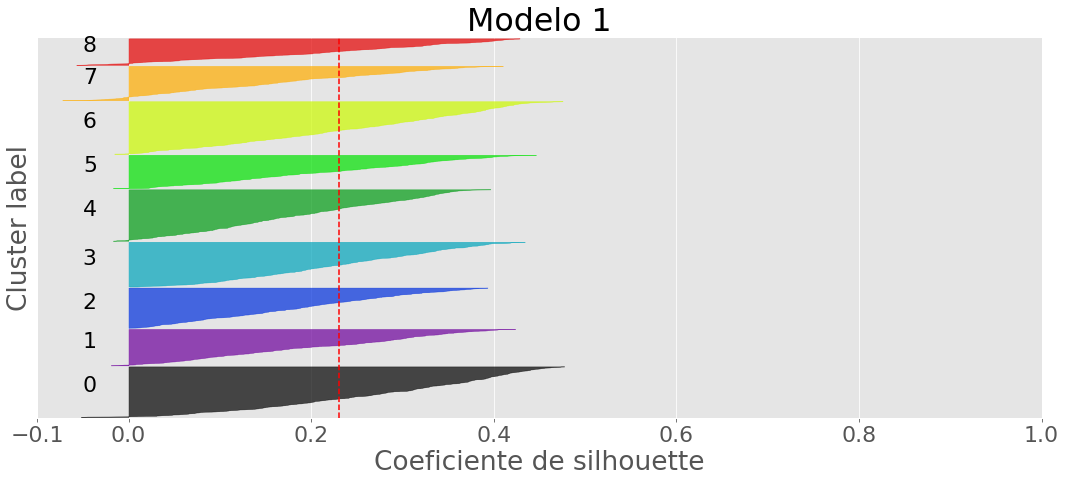

Modelo 2 : Coeficiente de Silhouette para cada cluster
          0
0 -0.003726
1  0.081957
2  0.219986
3  0.016510
4  0.055267
5  0.045131
6  0.047827
7  0.170628
8  0.043708


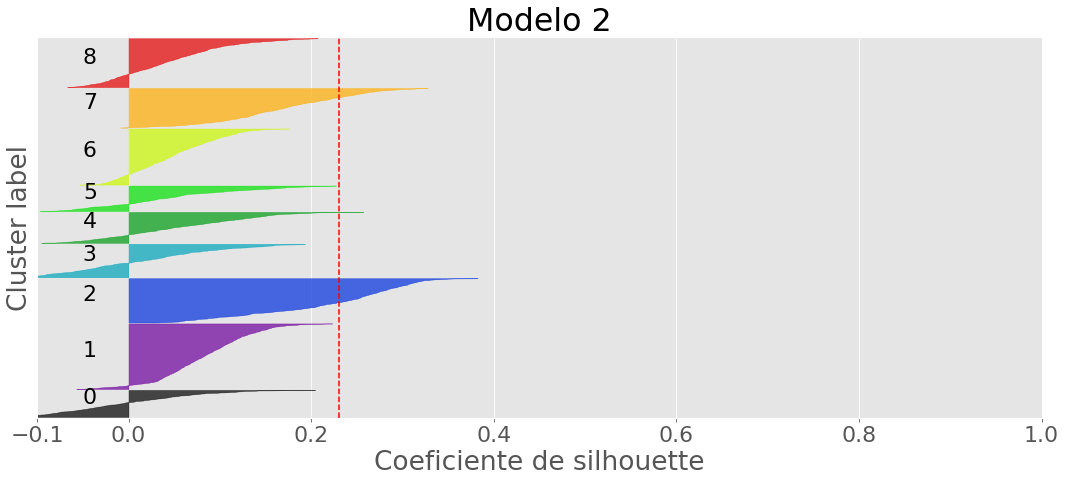

Modelo 3 : Coeficiente de Silhouette para cada cluster
          0
0  0.141020
1  0.092160
2  0.176848
3  0.128571
4  0.053484
5  0.235976
6  0.031485
7  0.094580
8  0.122180


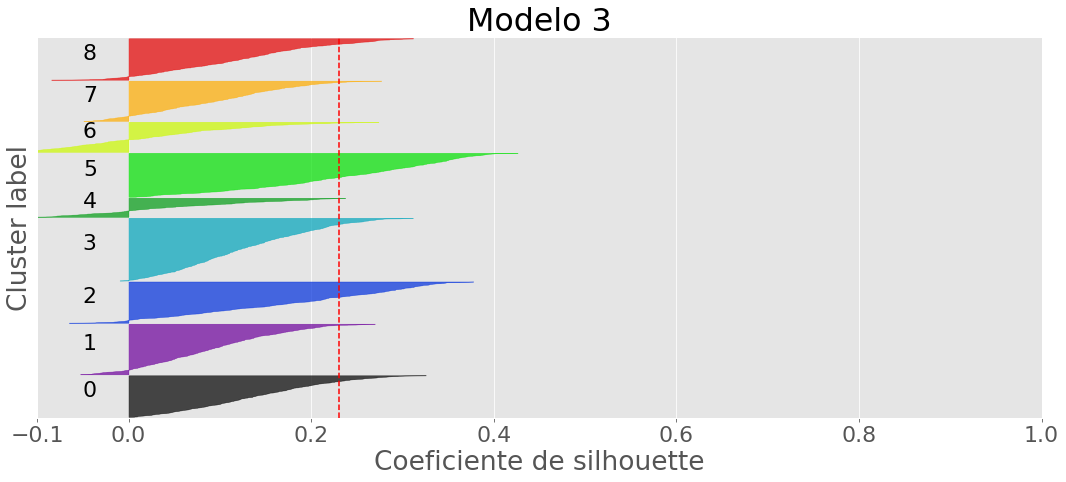

Modelo 4 : Coeficiente de Silhouette para cada cluster
          0
0  0.196579
1  0.037101
2  0.116795
3  0.047367
4  0.034953
5  0.046069
6  0.099488
7  0.093078
8  0.111190


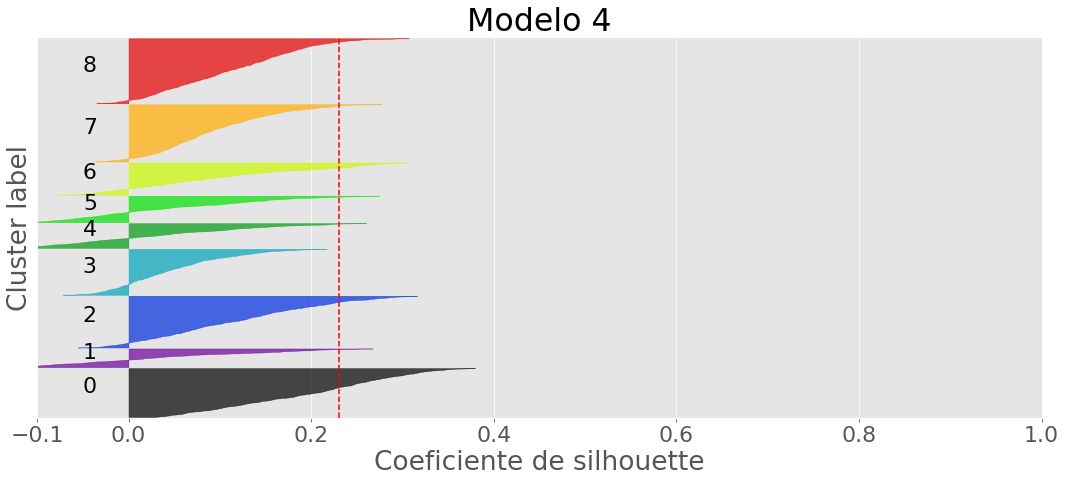

Modelo 6 : Coeficiente de Silhouette para cada cluster
          0
0  0.276503
1  0.166215
2  0.182399
3  0.345446
4  0.282561
5  0.184580
6  0.236906
7  0.207966
8  0.236875


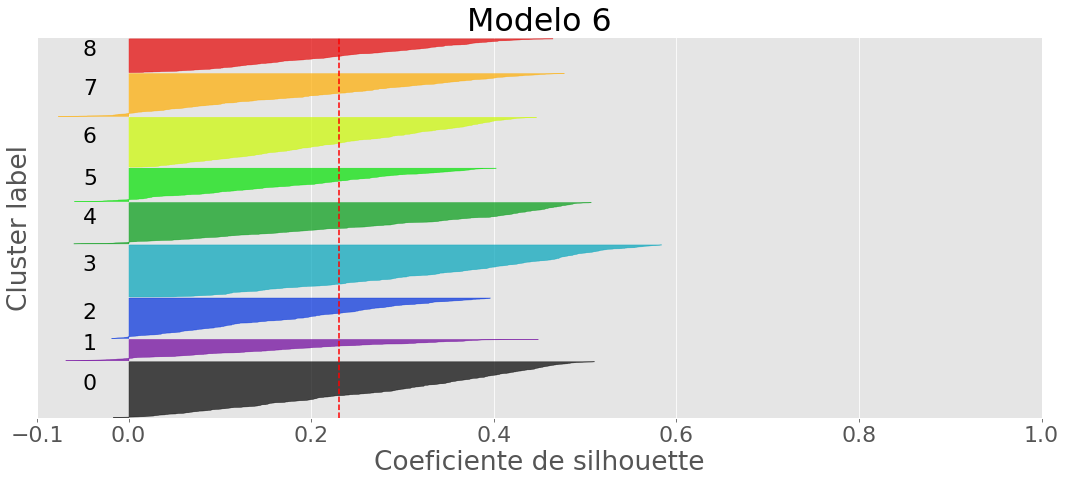

In [162]:
Lista_ = [("Modelo 1",DF1,kmeans1.labels_),
           ("Modelo 2",DF2_2,kmeans2.labels_),
           ("Modelo 3",DF3_2,kmeans3.labels_),
           ("Modelo 4",DF4_2,kmeans4.labels_),
           ("Modelo 6",DF5_2,kmeans5.labels_) ]

for (Modelo, Data_DF, label_DF) in Lista_:
  # Estimar el coeficiente de Silhouette para cada cluster
  #
  cluster_labels = label_DF
  n_clusters=len(np.unique(cluster_labels))
  ith_cluster_silhouette_avg = []

  sample_silhouette_values = silhouette_samples(Data_DF,label_DF)

  print(Modelo , ": Coeficiente de Silhouette para cada cluster")
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values)) 

  print(pd.DataFrame(ith_cluster_silhouette_avg))

  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(Data_DF) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Cluster label")
  ax1.set_title(Modelo)
  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

In [ ]:
!pip install gower
import gower

Vamos a construir una matriz de distancias de Gower para los datos personales, y realizamos un cluster jerárquico para tener una primera impresión sobre cómo se agrupan los datos.
¿Qué se puede decir de la presencia de grupos en el dataset?

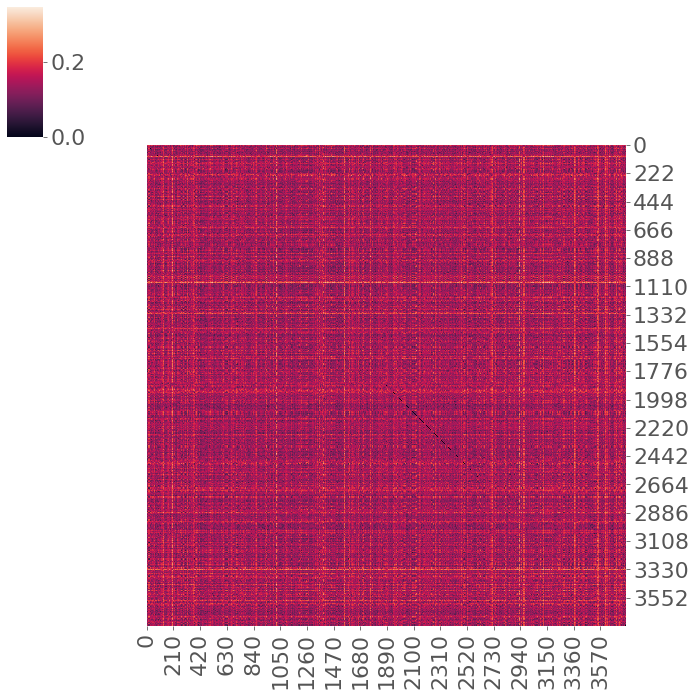

In [166]:
d_meta_total= DF1
d_meta_total = gower.gower_matrix(d_meta_total_1)
sns.clustermap(d_meta_total_1,row_cluster=False,col_cluster=False)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:630: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


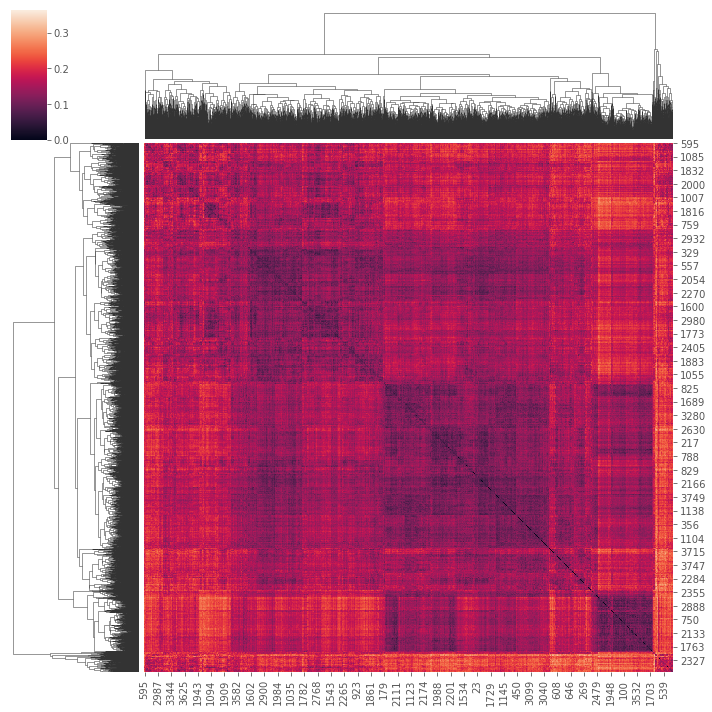

In [ ]:
sns.clustermap(d_meta_total)

#### PAM
Para agrupar los datos datos vamos a usar el método PAM, y como desconocemos el mejor valor de K a utilizar, vamos a probar varios y después usar los gráficos de SSE vs. k y Silhouette vs. k.
En el loop de más abajo se recorren los valores de k desde 2 hasta el máximo número de k (cantidad de clusters) que se van a probar. En cada iteración se calcula un nuevo PAM y con sus medoides se calcula el SSE y Silhouette.

In [ ]:
!pip install scikit-learn-extra 
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)

In [ ]:
# codigo de kmedioides 
#KM_meta=KMedoids(n_clusters=4,metric='precomputed',init='k-medoids++').fit(d_meta_total)

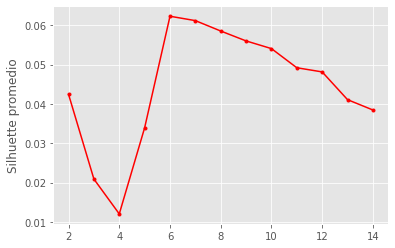

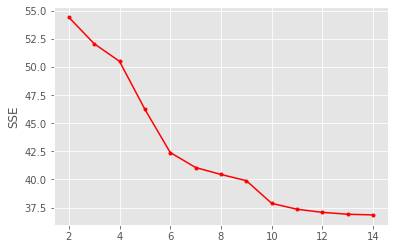

In [ ]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
   # KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='k-medoids++').fit(d_meta_total)
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


In [ ]:
import matplotlib.cm as cm

def grafica_silhouette(KM,d):
  silhouette_avg = silhouette_score(d,KM.labels_,metric='precomputed')
  sample_silhouette_values = silhouette_samples(d,KM.labels_,metric='precomputed')

  plt.rcParams['figure.figsize'] = (8,6)
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(KM.labels_) + (k + 1) * 10])

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[KM.labels_ == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                "with k = %d" % k),
                fontsize=14, fontweight='bold')
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


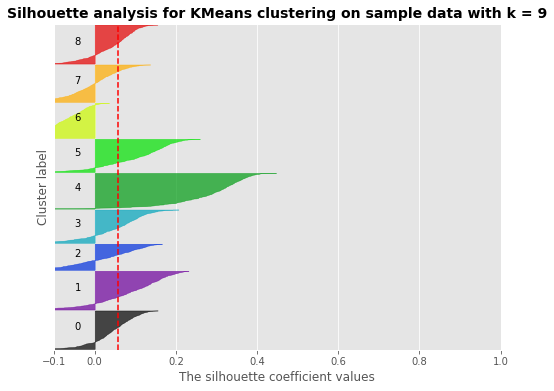

In [ ]:
df_total_2= df_total
df_total_2=df_total_2.dropna()
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

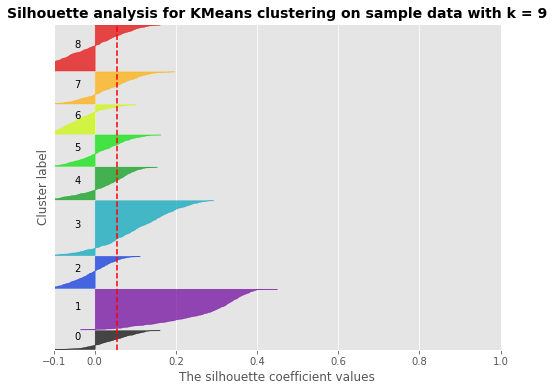

In [ ]:
k = 9
KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)
grafica_silhouette(KM_meta,d_meta_total)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import squareform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


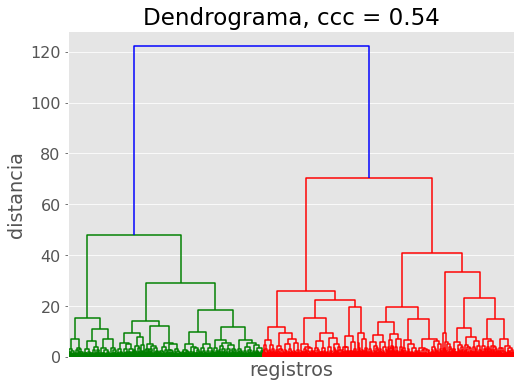

In [ ]:
Z = linkage(d_meta_total, 'ward')
c,_=cophenet(Z,Y=squareform(d_meta_total))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
dn = dendrogram(Z,no_labels=True)

([<matplotlib.axis.XTick at 0x7ffbb17df9b0>,
 <a list of 9 Text major ticklabel objects>)

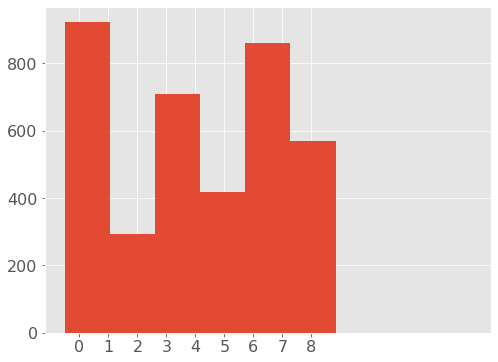

In [ ]:
plt.hist(KM_meta.labels_,bins=9,range=[-0.5,13.5])
plt.xticks(np.arange(0,9))

Veamos los valores que toman los prototipos

In [ ]:
df_total.iloc[KM_meta.medoid_indices_]

id       mp0  ...  energy_logit  loudness_logit
2400  4d3XHYFFuYYzxWr2cJ6yQl  0.277964  ...     -1.697495        0.382622
2955  5hxwbMY9Wqa89AClZOX5KC  0.545516  ...     -1.912275        0.254804
3083  5woh1sxJAvif6YheMtAdid  0.397483  ...      0.159483        0.513702
3505  6lNUewdE3ZY4vUMxXpHtIC  0.209256  ...     -2.376111        0.250804
2518  4qvMZBtrZxZlUl9nPR2p0y  0.407139  ...     -0.202475        1.298909
1696  3Dv8mXHPhKwkLDDTzyGvjC  0.258303  ...     -1.231172        0.496462
115   0EcqJhetbjFVyJhtkdnjsY  0.601678  ...      2.439187        1.880548
1366  2bbhyUWJ5VjdfI3P4PRLu2  0.116545  ...     -1.368162        1.349917
1702  3FCto7hnn1shUyZL42YgfO  0.552665  ...     -0.069472        1.453681

[9 rows x 71 columns]